# F21 AA. CW 1
# TASK 4 Model Training ,tuning and evaluation

# Naive Bayes Model

Imports

In [62]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

import mglearn
import matplotlib.pyplot as plt
# Custom PreprocessAndNorm.pynb module to perform preprocessing and Normalization for function reuse
%run ProcessingAndNorm.ipynb

[nltk_data] Downloading package stopwords to /Users/amit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Inputs - train Data 

In [2]:
# Preprocessed data from step 2 which used Stemming
df_reviews_p_s = pd.read_csv('df_reviews_p_s.csv')
df_reviews_p_s.head()

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
0,0,5,good receiv product earli seller tastey great ...,103,16,104,24
1,1,5,organ kosher tasti assort premium tea teasan n...,1199,193,799,126
2,2,5,excel glutenfre spaghetti great tast great str...,619,101,527,103
3,3,5,lindt lindt buy multipack misl pictur whole ha...,117,19,84,15
4,4,5,yum bar good love warm definit think great sna...,88,14,76,15


In [3]:
# Preprocessed data from step 2 which used Lemmatization
df_reviews_p_l = pd.read_csv('df_reviews_p_l.csv')
df_reviews_p_l.head()

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
0,0,5,good received product early seller tastey grea...,109,16,98,24
1,1,5,organic kosher tasty assortment premium tea te...,1334,193,664,126
2,2,5,excellent glutenfree spaghetti great taste gre...,690,101,456,103
3,3,5,lindt lindt buying multipack misled picture wh...,138,19,63,15
4,4,5,yum bar good loved warmed definitely think gre...,98,14,66,15


Inputs - Test Data

In [14]:
df_test=pd.read_csv('test.csv')
df_label=pd.read_csv('labels.csv')


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142114 entries, 0 to 142113
Data columns (total 9 columns):
Id                        142114 non-null int64
ProductId                 142114 non-null object
UserId                    142114 non-null object
ProfileName               142112 non-null object
HelpfulnessNumerator      142114 non-null int64
HelpfulnessDenominator    142114 non-null int64
Time                      142114 non-null int64
Summary                   142107 non-null object
Text                      142114 non-null object
dtypes: int64(4), object(5)
memory usage: 9.8+ MB


In [16]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142114 entries, 0 to 142113
Data columns (total 2 columns):
Id       142114 non-null int64
Score    142114 non-null int64
dtypes: int64(2)
memory usage: 2.2 MB


Reuse preprocessing done in task 2

In [17]:
df_test_data = pd.merge(df_label, df_test, on='Id')
df_test_data.Summary.fillna('',inplace=True)
df_test_data.Text.fillna('', inplace=True)
df_test_data['Summary_text']=df_test_data['Summary']+" "+df_test_data['Text']
df_test_data = df_test_data[['Score','Summary_text']]
df_test_data['Score']=df_test_data.Score.astype('category')
df_test_data=Perform_Preprocessing(df_test_data)
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142114 entries, 0 to 142113
Data columns (total 2 columns):
Score           142114 non-null category
Summary_text    142114 non-null object
dtypes: category(1), object(1)
memory usage: 2.3+ MB


In [21]:
X_test=df_test_data['Summary_text']
X_test

0         love flavor fog chaser best flavor body far pr...
1         tasty tea found pf changs tastes great 16 bags...
2         yum quite chocolate bar substitute delicious a...
3         gluten free biscotti tasty pamelas almond bisc...
4         happy puppies hrefhttpwwwamazoncomgpproductb00...
                                ...                        
142109    great treats buying store hard time keeping st...
142110    nongmo magnesium boost glad companies making p...
142111    real thing similar love real scottish haggis b...
142112    wow awesome syrup eat lot syrup house three ye...
142113    dog buy give dog needs lose weight gets hungry...
Name: Summary_text, Length: 142114, dtype: object

In [22]:

Y_test=df_test_data['Score']
Y_test

0         5
1         5
2         5
3         3
4         4
         ..
142109    5
142110    5
142111    4
142112    5
142113    5
Name: Score, Length: 142114, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

## Model Building,tuning and evaluation

### 1) Preprocessed data with stemming

Define train data

In [ ]:
X_train=df_reviews_p_s['Summary_text']
Y_train=df_reviews_p_s['Score']

#### a) Bag of words

Create pipeline

In [112]:
pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer='word',min_df=25)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Create parameter grid

In [113]:
param_grid1 = {'classifier__alpha': [0.1,0.5, 1],
               "bow__ngram_range": [(1, 1), (1, 2)]}

grid1 = GridSearchCV(pipeline1, param_grid1, cv=3)


Use grid to find beest hyperparameters

In [114]:
grid1.fit(X_train, Y_train)
print("Best cross-validation score: {:.2f}".format(grid1.best_score_))

Best cross-validation score: 0.73


Print scores

In [115]:
scores1 = grid1.cv_results_['mean_test_score'].reshape(-1, 2).T
scores1

array([[0.69190553, 0.69161233, 0.72309659],
       [0.69164048, 0.72748511, 0.72098326]])

Display Heat map of scores vs parameters

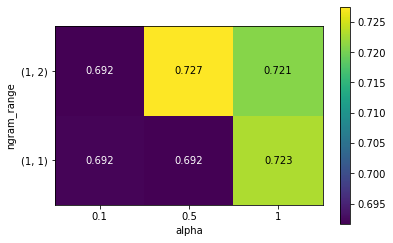

In [116]:
# visualize heat map

heatmap1 = mglearn.tools.heatmap(
    scores1, xlabel="alpha", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid1['classifier__alpha'],
    yticklabels=param_grid1['bow__ngram_range'])
plt.colorbar(heatmap1)

Tuned pipeline

In [150]:
pipe1 = Pipeline([
    ('bow', CountVectorizer(analyzer='word',ngram_range=(1,2),min_df=25)),  # strings to token integer counts
    ('classifier', MultinomialNB(alpha =0.5)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Fit train data

In [146]:
pipe1.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=25,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

Predict values for test data

In [148]:
predictions1 = pipe1.predict(X_test)

Print Result

In [149]:
print(classification_report(predictions1,Y_test))

              precision    recall  f1-score   support

           1       0.57      0.56      0.56     13349
           2       0.36      0.38      0.37      7039
           3       0.45      0.39      0.42     12268
           4       0.36      0.42      0.39     17043
           5       0.85      0.83      0.84     92415

    accuracy                           0.70    142114
   macro avg       0.52      0.52      0.52    142114
weighted avg       0.71      0.70      0.70    142114



#### b) Tf-IDF vectorization

Create Pipeline

In [122]:
pipeline2 = Pipeline([
    ('Tfidf', TfidfVectorizer(min_df=25)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Create parameter grid

In [123]:
param_grid2 = {'classifier__alpha': [0.1,0.5, 1],
               "Tfidf__ngram_range": [(1, 1), (1, 2)]}

grid2 = GridSearchCV(pipeline2, param_grid2, cv=3)

Fit training data

In [124]:
grid2.fit(X_train, Y_train)
print("Best cross-validation score: {:.2f}".format(grid2.best_score_))

Best cross-validation score: 0.75


Print Results

In [125]:
scores2 = grid2.cv_results_['mean_test_score'].reshape(-1, 2).T
scores2

array([[0.68422855, 0.6788291 , 0.7391495 ],
       [0.68187597, 0.75343388, 0.7185603 ]])

Display results as a heat map

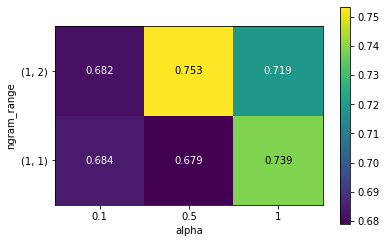

In [126]:
# visualize heat map

heatmap2 = mglearn.tools.heatmap(
    scores2, xlabel="alpha", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['classifier__alpha'],
    yticklabels=param_grid['Tfidf__ngram_range'])
plt.colorbar(heatmap2)

Tuned pipeline

In [141]:
pipe2 = Pipeline([
    ('Tfidf', TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=25)),  # strings to token integer counts
    ('classifier', MultinomialNB(alpha =0.1)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])



Fit training data

In [142]:
pipe2.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('Tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=35, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

Make predictions on test data

In [143]:
predictions2 = pipe2.predict(X_test)

Print results

In [144]:
print(classification_report(predictions2,Y_test))

              precision    recall  f1-score   support

           1       0.41      0.71      0.52      7538
           2       0.09      0.71      0.17       979
           3       0.17      0.60      0.27      3076
           4       0.11      0.60      0.18      3606
           5       0.99      0.70      0.82    126915

    accuracy                           0.70    142114
   macro avg       0.35      0.67      0.39    142114
weighted avg       0.91      0.70      0.77    142114



### 2) Preprocessed data with lemmatization

Set train data 

In [151]:
X_train2=df_reviews_p_l['Summary_text']
Y_train2=df_reviews_p_l['Score']

#### a) Bag of words

Create Pipeline

In [152]:
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer='word',min_df=25)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Create parameter grid

In [153]:
param_grid3 = {'classifier__alpha': [0.1,0.5, 1],
               "bow__ngram_range": [(1, 1), (1, 2)]}

grid3 = GridSearchCV(pipeline3, param_grid3, cv=3)



Fit training data

In [154]:
grid3.fit(X_train2, Y_train2)
print("Best cross-validation score: {:.2f}".format(grid3.best_score_))

Best cross-validation score: 0.73


Print results

In [155]:
scores3 = grid3.cv_results_['mean_test_score'].reshape(-1, 2).T
scores3

array([[0.697183  , 0.69684994, 0.72513253],
       [0.69676315, 0.72903786, 0.72287142]])

Display Heatmap of results

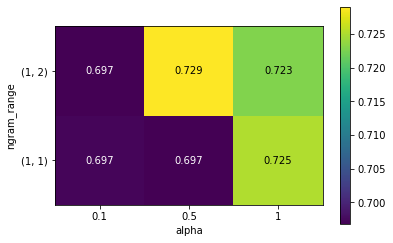

In [156]:
# visualize heat map
heatmap3 = mglearn.tools.heatmap(
    scores3, xlabel="alpha", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid3['classifier__alpha'],
    yticklabels=param_grid3['bow__ngram_range'])
plt.colorbar(heatmap3)

Finetuned Pipe

In [163]:
pipe3 = Pipeline([
    ('Tfidf', TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=25)),  # strings to token integer counts
    ('classifier', MultinomialNB(alpha =1)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])



Fit training data

In [164]:
pipe3.fit(X_train2,Y_train2)

Pipeline(memory=None,
         steps=[('Tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=25, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1, class_prior=None, fit_prior=True))],
         verbose=False)

Make predictions on test data

In [166]:
predictions3 = pipe3.predict(X_test)

Print Results

In [167]:
print(classification_report(predictions3,Y_test))

              precision    recall  f1-score   support

           1       0.59      0.73      0.66     10613
           2       0.08      0.92      0.15       674
           3       0.17      0.72      0.27      2456
           4       0.18      0.60      0.28      6288
           5       0.99      0.73      0.84    122083

    accuracy                           0.73    142114
   macro avg       0.40      0.74      0.44    142114
weighted avg       0.90      0.73      0.79    142114



#### b) Tf-IDF vectorization

Create Pipeline

In [157]:
pipeline4 = Pipeline([
    ('bow', CountVectorizer(analyzer='word',min_df=25)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Create parameter grid

In [158]:
param_grid4 = {'classifier__alpha': [0.1,0.5, 1],
               "bow__ngram_range": [(1, 1), (1, 2)]}

grid4 = GridSearchCV(pipeline4, param_grid4, cv=3)




Fit Training data

In [159]:
grid4.fit(X_train2, Y_train2)
print("Best cross-validation score: {:.2f}".format(grid4.best_score_))

Best cross-validation score: 0.73


Display results

In [160]:
scores4 = grid4.cv_results_['mean_test_score'].reshape(-1, 2).T
scores4

array([[0.697183  , 0.69684994, 0.72513253],
       [0.69676315, 0.72903786, 0.72287142]])

Display heatmap of results

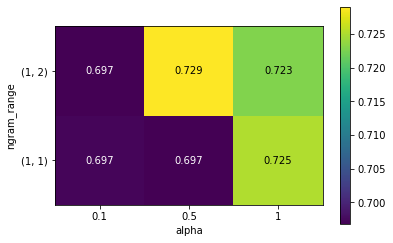

In [162]:
# visualize heat map

heatmap4 = mglearn.tools.heatmap(
    scores4, xlabel="alpha", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid3['classifier__alpha'],
    yticklabels=param_grid3['bow__ngram_range'])
plt.colorbar(heatmap4)

Finetuned pipeline

In [168]:
pipe4 = Pipeline([
    ('Tfidf', TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=25)),  # strings to token integer counts
    ('classifier', MultinomialNB(alpha =0.5)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])



Fit train data

In [169]:
pipe4.fit(X_train2,Y_train2)

Pipeline(memory=None,
         steps=[('Tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=25, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True))],
         verbose=False)

Predict for test data

In [170]:
predictions4 = pipe4.predict(X_test)

Display Results

In [171]:
print(classification_report(predictions4,Y_test))

              precision    recall  f1-score   support

           1       0.66      0.72      0.69     12082
           2       0.18      0.83      0.29      1570
           3       0.26      0.69      0.38      4056
           4       0.23      0.61      0.34      7773
           5       0.98      0.76      0.86    116633

    accuracy                           0.75    142114
   macro avg       0.46      0.72      0.51    142114
weighted avg       0.88      0.75      0.79    142114

